# Exploratory Data Cleaning

In [217]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

file_path = "../data/raw/unclean_data.csv"

df = pd.read_csv(file_path)

# Basic Information

In [148]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [149]:
df.shape

(271116, 15)

In [150]:
df.info()


# Columns with missing values: Age, Height, Weight, Medal 
# Columns to be check for standardisation: Name, Sex, Team, NOC, Games, City, Sport, Event, Medal
# Columns to be type-converted: ID - int64 to object  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [151]:
df.describe()

## Notes:
  # Analyse outlier ages, heights, and weights 
  # Check if Olympics ever missed or on odd year

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# Standardisation and Type Conversion

In [196]:
# Standardise column names

cols = df.columns
cols_standardised = [c.lower() for c in cols]
df = df.rename(columns=dict(zip(cols, cols_standardised)))
df = df.rename(columns={"weight": "weight_kg", "height": "height_cm"})

In [197]:
# Ensure capitalisation of object columns
object_cols = df.select_dtypes(include=["object"])
for col in object_cols:
    df[col] = df[col].str.title()

# Duplicates Handling

In [200]:
int(df.duplicated().sum())

# Some duplicate data, which needs dropped

1385

In [201]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

# Null Handling

/var/folders/kr/36825vtj0w52wlmvq1fzcz4m0000gn/T/ipykernel_61685/542920044.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


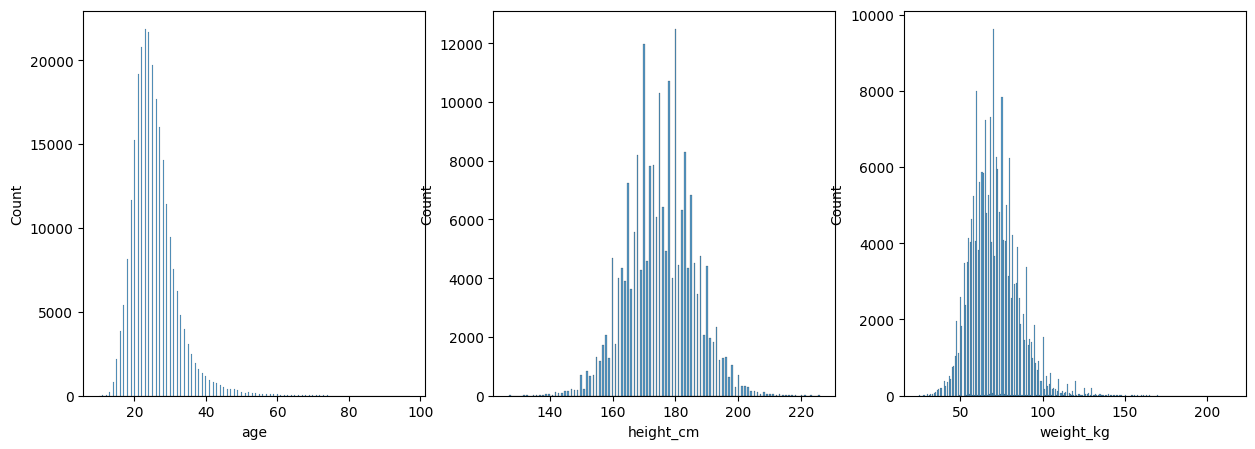

In [156]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=df, x="age", ax=ax[0])
sns.histplot(data=df, x="height_cm", ax=ax[1])
sns.histplot(data=df, x="weight_kg", ax=ax[2])
fig.show()

In [214]:
# Calculate percentage of missing height per sport
missing_pct = df.groupby("sport")["height_cm"].apply(lambda x: (x.isna().sum() / len(x)) * 100)
missing_pct[missing_pct == 100]

sport
Aeronautics            100.0
Alpinism               100.0
Basque Pelota          100.0
Cricket                100.0
Croquet                100.0
Military Ski Patrol    100.0
Roque                  100.0
Name: height_cm, dtype: float64

In [215]:
# Calculate percentage of missing weight per sport
missing_pct = df.groupby("sport")["weight_kg"].apply(lambda x: (x.isna().sum() / len(x)) * 100)
missing_pct[missing_pct == 100]

sport
Aeronautics            100.0
Alpinism               100.0
Basque Pelota          100.0
Cricket                100.0
Croquet                100.0
Jeu De Paume           100.0
Military Ski Patrol    100.0
Polo                   100.0
Racquets               100.0
Roque                  100.0
Name: weight_kg, dtype: float64

In [216]:
# Calculate percentage of missing age per sport
missing_pct = df.groupby("sport")["age"].apply(lambda x: (x.isna().sum() / len(x)) * 100)
missing_pct[missing_pct == 100]

Series([], Name: age, dtype: float64)

In [198]:
# Use sport groups to impute missing age, height, weight 
df['age'] = df.groupby('sport')['age'].transform(lambda x: x.fillna(x.mean()))
df['height_cm'] = df.groupby('sport')['height_cm'].transform(lambda x: x.fillna(x.mean()))
df['weight_kg'] = df.groupby('sport')['weight_kg'].transform(lambda x: x.fillna(x.mean()))

In [158]:
df["medal"].value_counts()

# Note: unequal medal ratio, so some events likely have some medals not recorded

medal
Gold      13369
Bronze    13295
Silver    13108
Name: count, dtype: int64

In [202]:
# Convert missing medal to "No Medal"
df["medal"] = df["medal"].fillna("No Medal")

In [203]:
df.info()

# All missing values handled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269731 entries, 0 to 269730
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         269731 non-null  int64  
 1   name       269731 non-null  object 
 2   sex        269731 non-null  object 
 3   age        269731 non-null  float64
 4   height_cm  269632 non-null  float64
 5   weight_kg  269514 non-null  float64
 6   team       269731 non-null  object 
 7   noc        269731 non-null  object 
 8   games      269731 non-null  object 
 9   year       269731 non-null  int64  
 10  season     269731 non-null  object 
 11  city       269731 non-null  object 
 12  sport      269731 non-null  object 
 13  event      269731 non-null  object 
 14  medal      269731 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 30.9+ MB


In [187]:
sport_avg_age = df.groupby('Sport')['Height'].mean()

# Fill missing values
df['Height'] = df['Height'].fillna(df['Sport'].map(sport_avg_age))


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  271017 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
